In [1]:
from PIL import Image

# 10 - 1 

## 딥러닝을 잘하는 방법 <br>
### 1. sigmoid 대신 ReLU를 사용하자

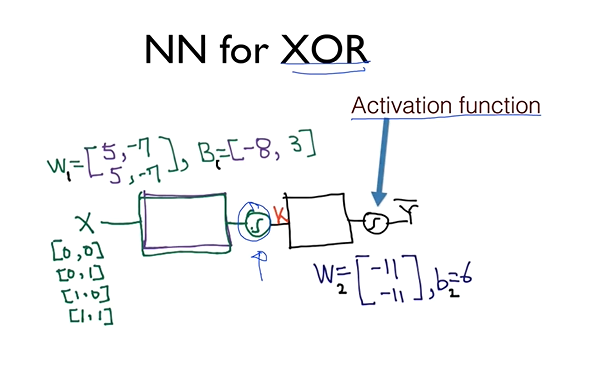

In [2]:
Image.open('Activation.png')

Activation Function <br>
sigmoid 함수로 인하여 어느 값 이상라면 active(1)가 되고 이하면 active가 되지 않아서 Activation Function이라고 부른다.


2단 Neural Net

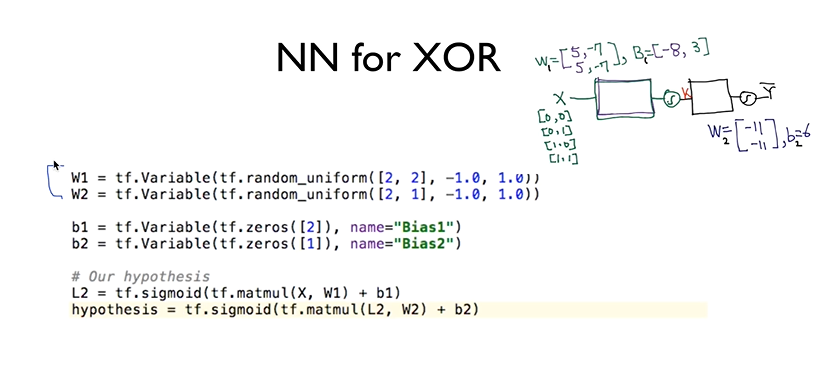

3단 Neural Net

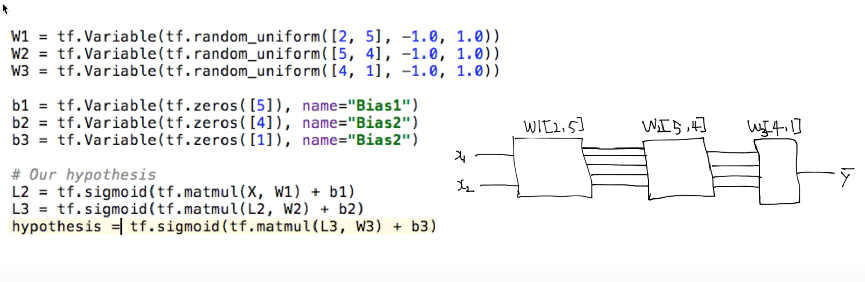

3단으로 하게 되면 w1,w2,w3 있는 uniform값들만 조정을 잘하면 된다. <br> 
W1 [2, 5]의 앞에 2는 X가 몇개인지를 의미하고 (여기에서는 X1, X2가 들어간다 그리고 5는 몇개를 출력하고 싶은지를 적음 (5개를 출력)<br>
W2 는 5개를 받아야하고 4개를 출력을하고 W3는 4를 받아서 1개를 출력을 하게 된다. <BR>
  제일 마지막은 1개로 정해져 있다.

b 1,2,3 은 W가 출력한 대로 사용

맨앞을 input Layer 라고 마지막을 output Layer 라고 한다. <br>
그 사이에 있는 것들은 hidden Layer 라고 한다.

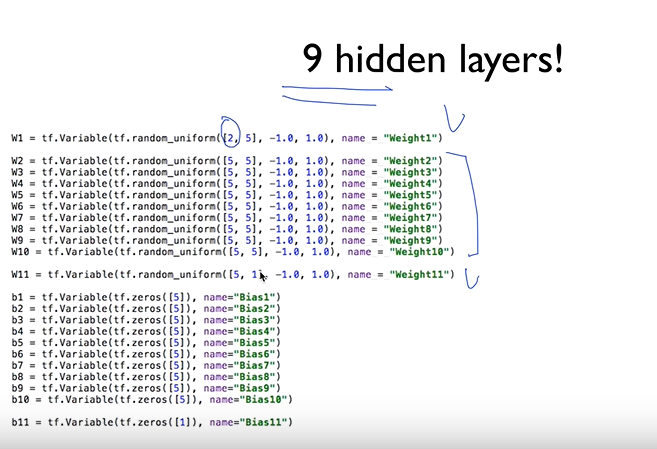

9단 Layer인데 처음이랑 마지막 크기만 신경쓰면 된다.

L1 = tf.sigmoid(tf.matmul(X, W1) +b1)<br>
L2 = tf.sigmoid(tf.matmul(L1, W2) +b2)<br>
L3 = tf.sigmoid(tf.matmul(L2, W3) +b3)<br>
L4 = tf.sigmoid(tf.matmul(L3, W4) +b4)<br>
L5 = tf.sigmoid(tf.matmul(L4, W5) +b5)<br>
L6 = tf.sigmoid(tf.matmul(L5, W6) +b6)<br>
L7 = tf.sigmoid(tf.matmul(L6, W7) +b7)<br>
L8 = tf.sigmoid(tf.matmul(L7, W8) +b8)<br>
L9 = tf.sigmoid(tf.matmul(L8, W9) +b9)<br>
L10 = tf.sigmoid(tf.matmul(L9, W10) +b10)<br>

hypothesis = tf.sigmoid(tf.matmul(L10,W11) +b11


여기 앞줄에 하나씩 with tf.name_scope("layer1") as scope: 라고 이름을 주어지게 하여 <br>
tensorboard를 실행하여 만든 그래프를 시각화 할 수 있다.<br>
복잡한 deep learning이 설정되었을 때 시각화 된 것을 보고 한눈에 알아볼 수 있다.

## 결과

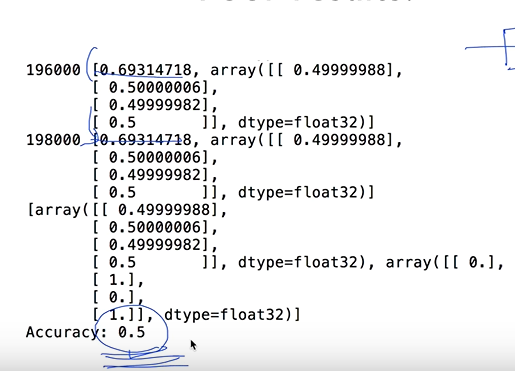

accuracy 가 1개로 돌린 것과 9개로 돌린 것과 같은 결과가 나옴

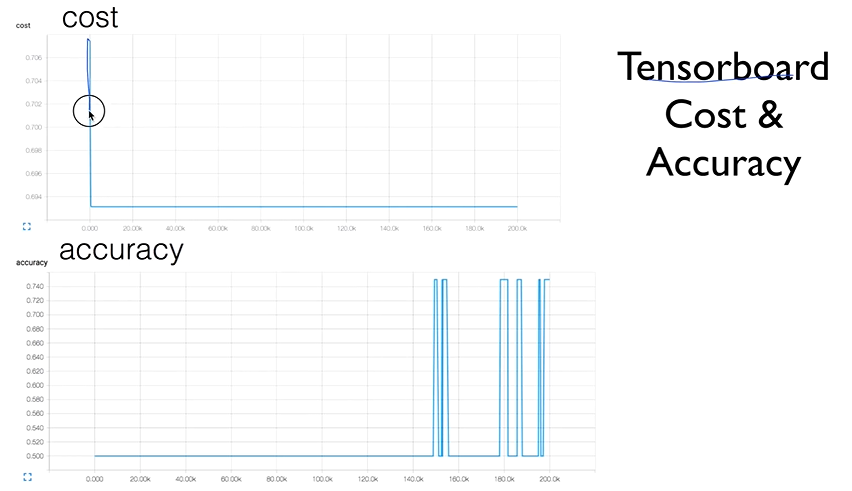

tensorboard로 확인한 결과 cost는 0.604 이하로 떨어져서 그대로 가고 <br>
accuracy로 0.75 랑 0을 왔다갔다 하다가 0에서 멈추는 것을 확인

Backpropagation <br>
> 1단 2단은 학습이 잘되는데 9단정도 되는 것은 학습이 안되는 것 

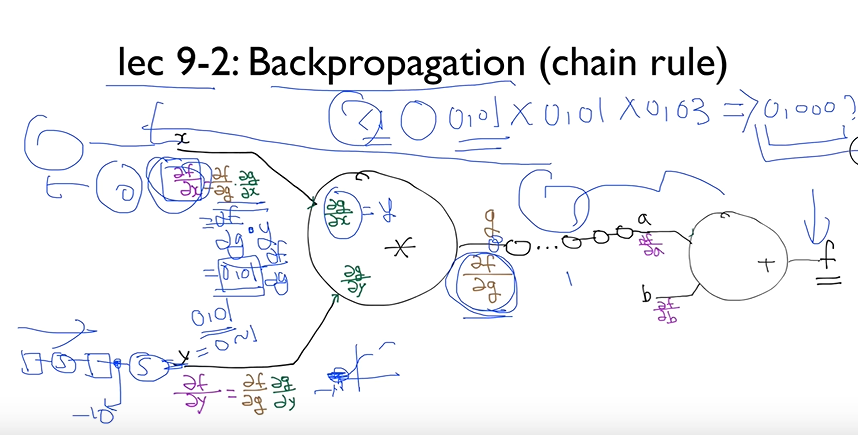

x 가 최종 f 에 무슨 영향을 끼치는지 알기 위해서 미분으로 계산을 했다.

af/ax = (af/ag)*(ag/ax) chain rule 로 인하여 x가 f한테 무슨 영향을 끼치는지 알 수 있다.<br>
*gate가 있을 경우 ag/ax 는 y가 된다. 즉<br>
af/ax = (af/ag)*y <br>
y는 sigmoid로 인하여 0~1사이의 값을 가진다.<br>
ex_ 앞에서 sigmoid를 통과하기전에 -10 이면 sigmoid로 인하여 0과 가까운 0.01이라는 값을 y가 가졌다고 하면<br>
af/ax = 0.01*(af/ag) 일 것이다. <br>
이것이 더 backpropagation이 될 수록 chain rule로 인하여 1보다 작은 값들이 곱해지다보니 최종미분값은 0 과 가까운 값이 되어버린다. <br>
이것이 문제이다. 0과 가까운 값은 f에 영향이 거의 없다는 것<br>
-> Vanishing gradient 라고 함

Vanishing gradient 때문에 1986년부터 제 2차 NN net정지 시기를 가지게 된다.

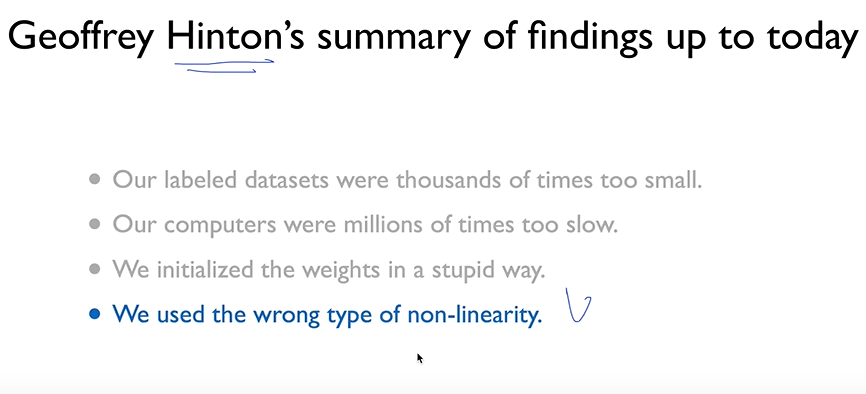

나중에 Hinton 박사가 이것을 풀게 되는데 Hinton 박사는 sigmoid를 잘 못썻다고 주장<br>
문제점 <br>
sigmoid로 인하여 1보다 작은 값이 오게되어 1보다 작은 값을 계속 곱하다보니 chain rule 로 최종값이 0과 가까워 진다.

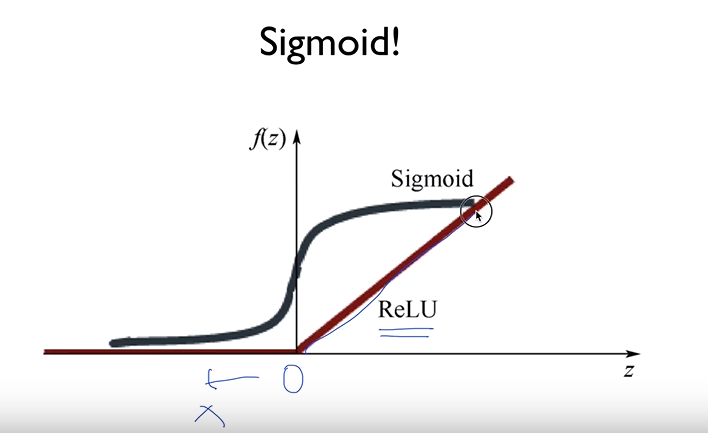

ReLU <BR>
0보다 작으면 active 하지 않게 하고 0보다 크면 값이 계속 커지게 하여 active 시킴

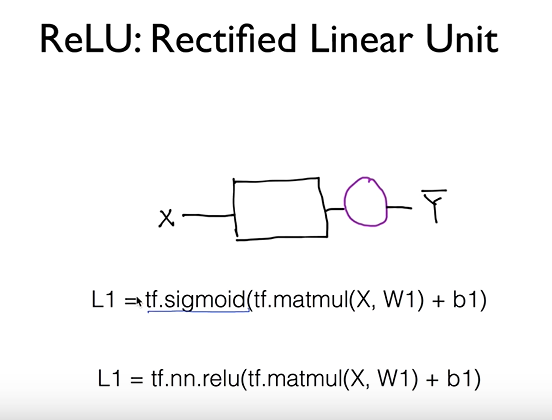

코드로 바꾸면 sigmoid 자리에 relu 를 사용하여 기존의 네트워크를 사용할 수 있다.

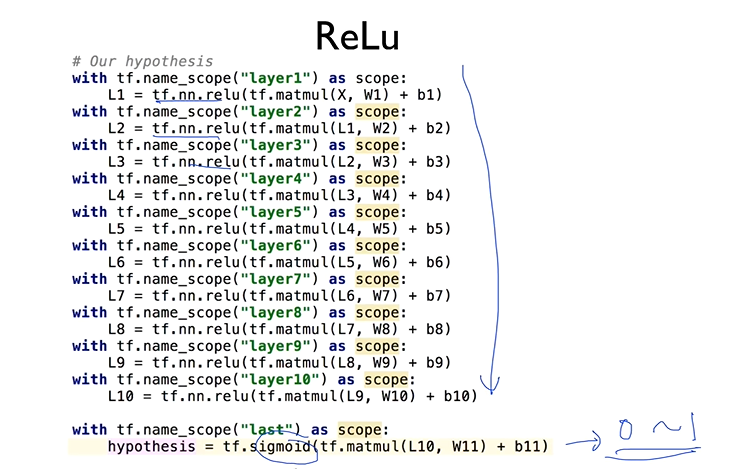

다 relu로 바꾸고 마지막만 sigmoid로 한다. <br>
이유는 최종값은 0~1 사이의 값으로 얻어야 하기 때문

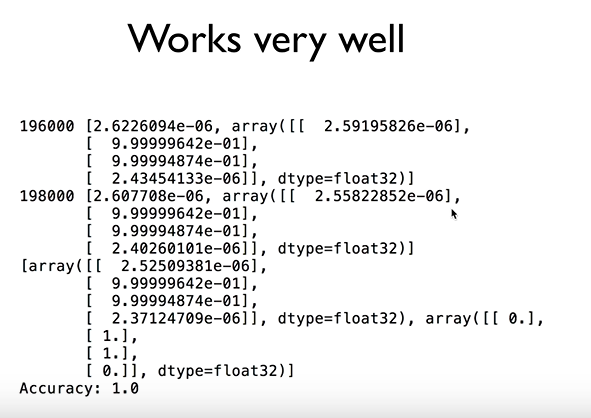

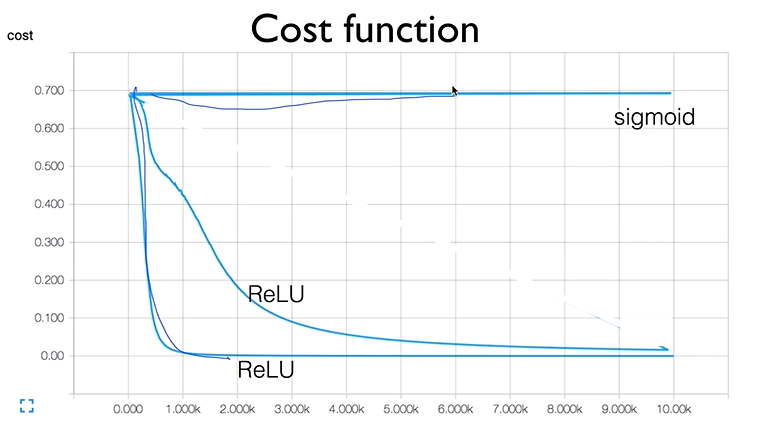

sigmoid는 cost 값이 떨어지지 않지만 <br>
relu는 잘 떨어지는 것을 확인

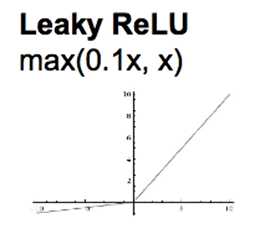

ReLU을 응용하여 만든 것이 Leaky ReLU <BR>
Leaky ReLU : 0을 좀 살려주자. (0.1을 곱함)

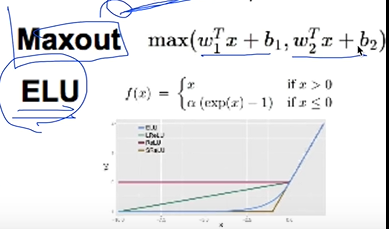

조금씩 다른 형태로 응용되어 여러가지가 나옴

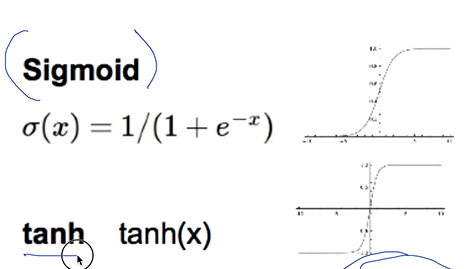

Sigmoid를 살리기 위해 tanh가 나옴<br>
tanh : sigmoid 0을 중심으로 되게 내려서 -1 ~ 1의 값이 되도록 한다.

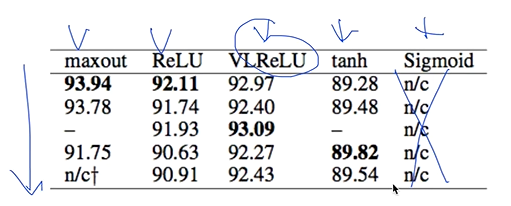

정확도를 보았더니 sigmoid는 수렴을 못하는 것을 확인

### 2번째. 초기값을 어떻게 할 것인가?

Hinton 교수가 4가지의 문제점을 말했는데 하나는 sigmoid를 사용하는 것이고 <br>
다음 것은 초기값을 이상하게 주어지게 하였다는 것이다.

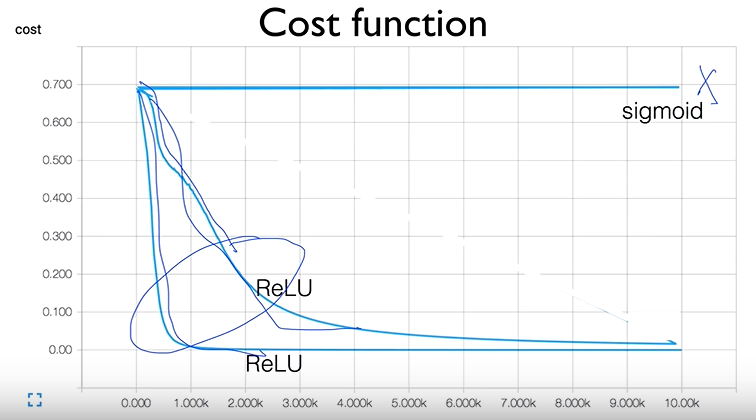

ReLU를 돌릴 때마다 cost 떨어지는 것이 다르다. <br>
> weight에서 random 값(-1 ~ 1)에 따라서 결과가 차이가 난다

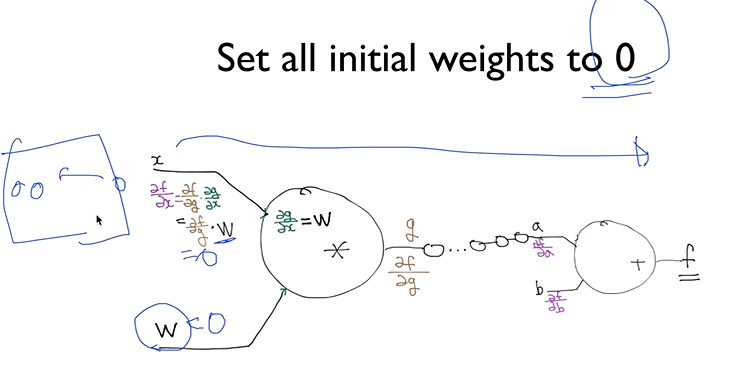

예시로 w를 0이라고 하면 <br>
chain rule로 인하여 w가 사용되는데 0을 곱해서 기울기는 0이 되고 다 0이 되어 버린다. <br>
> Gradient가 사라지게 되는 문제점

Hinton박사가 2006년에 발표한 논문으로 안하여 <BR>
Resticted Boatman Maching (RBM) 을 발표 <BR>
    RBM은 지금은 사용되지는 않지만 많이 사용되는 용어 이다.<br>
    RBM을 사용하여 초기화를 시킨 NET을 Deep Belief Nets 라고 한다.

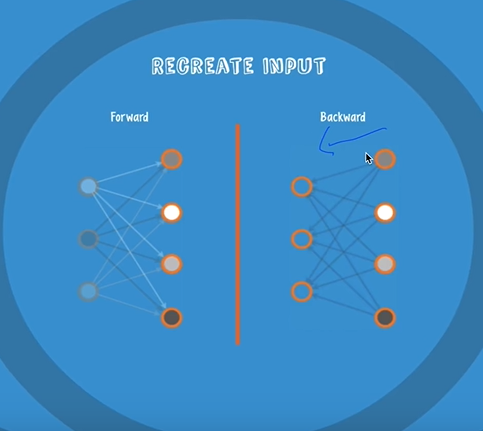

Forword = 주어진 입력값 x과 weight를 사용하여 어떠한 값을 만들어 냄 <br>
Backword = forword 에서 만든 값과 weight를 역으로 곱하여 x를 만든다 <br>
그리고 비교를 함<br>
처음에 Forword에서 주어진 x와 만든 x 의 차이가 최저가 되도록 weight를 조절 한다.<br>
encoder / decoder 라고도 한다.

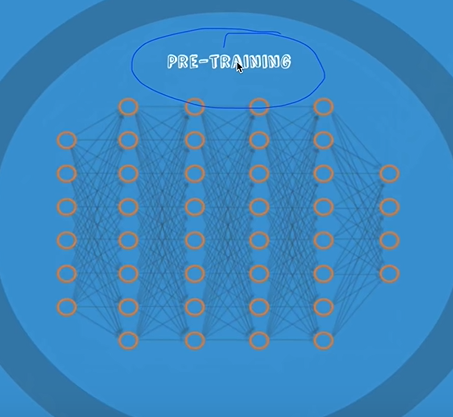

2개의 label들 끼리 weight 를 계속 학습 시킴<br>
초기화 값으로 학습된 weight 값을 사용

그리고 실제 x 데이터로 label를 돌려 학습을 시켰을 때 data를 많이 사용하지 않고 학습이 되어 이것을 학습이 아니라 Fine tuning 이라고 한다.<br>
> 이미 weight 들이 학습이 되어있서 좀만 tuning 하면 되기 때문에

하지만 오늘날에는 이렇게 복잡한 RBM를 사용하지 않고 그냥 간단한 값을 주어지면 된다는 것을 알게됨

2010 <br>
Xavier initialization : 하나의 노드에 입력과 출력의 갯수의 비례하여 초기값을 주자 <br>
2015년에 개선

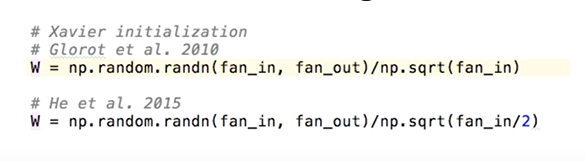

fan_in = 입력이 몇개 인가? fan_out 출력이 몇개 인가 

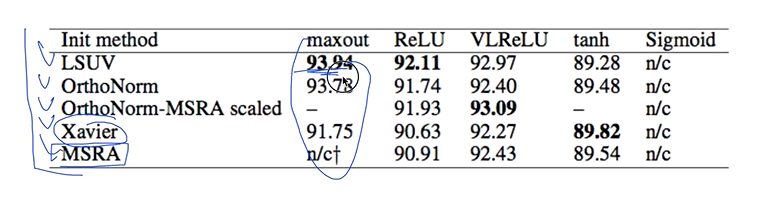

여러 초기값을 정하는 방법을 사용하여 정확도가 어느정도는 나온다는 것을 확인 <br>
아직도 연구되고 있는 분야

## 3번째 Dropout 과 앙상블

overfitting = train data에서는 accuracyrk 100%가 나오지만 test에서는 작동이 잘 안된다. (과도한 학습)

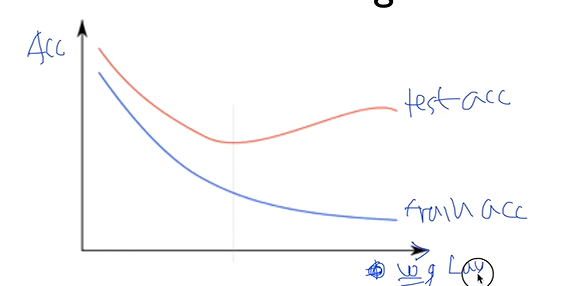

train data 는 layer 많아질수록 에러율은 떨어지고 잘 학습 되는 것 처럼 보인다.<br>
test data 에서는 어느순간부터 에러율이 상승하기 시작 - overfitting<br>

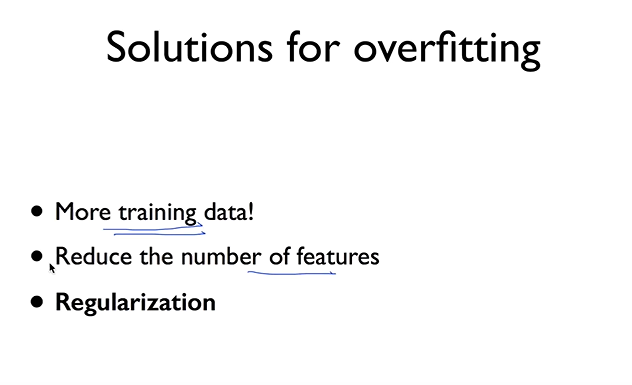

overfitting 을 방지하기 위해 1. 많은 training data를 사용하거나 3.Regularization을 사용

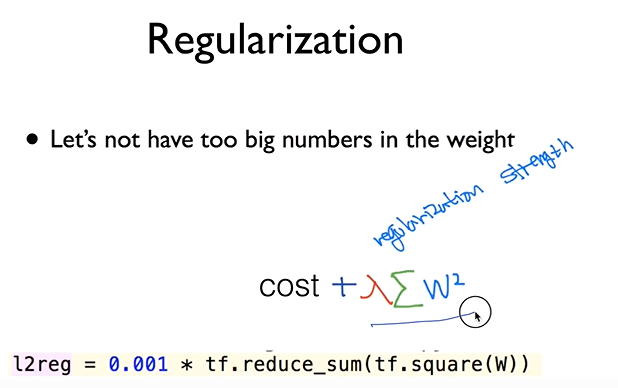

NN Net <br>
Dropout(2014)  

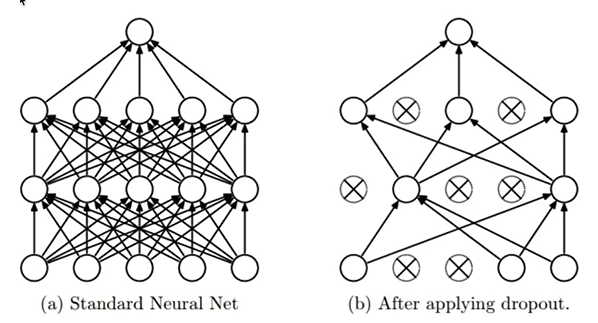

엮어놓은 몇개의 노드들을 잘라서 사용하지 말자

학습을 할 때마다 다 사용하지 않고 랜덤으로 몇개만 사용하여 학습 시키고 계속 랜덤으로 뽑아서 몇개만 학습시켜서 <br>
실제 예측을 할 때에서는 전체를 다 이용하여 예측을 하게 하면 잘 나온다

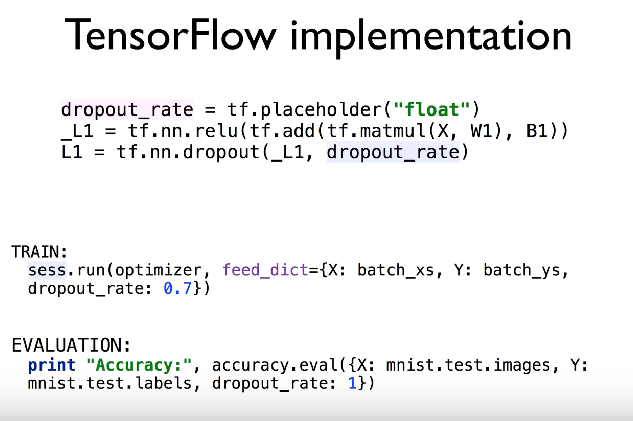

실제 구현방법 

학습 할 때에는 rate를 1이 아니라 70% 만 사용하거나 보통은 0.5를 많이 사용<br>
실제 구현할 때에는 무조건 1로 해야함

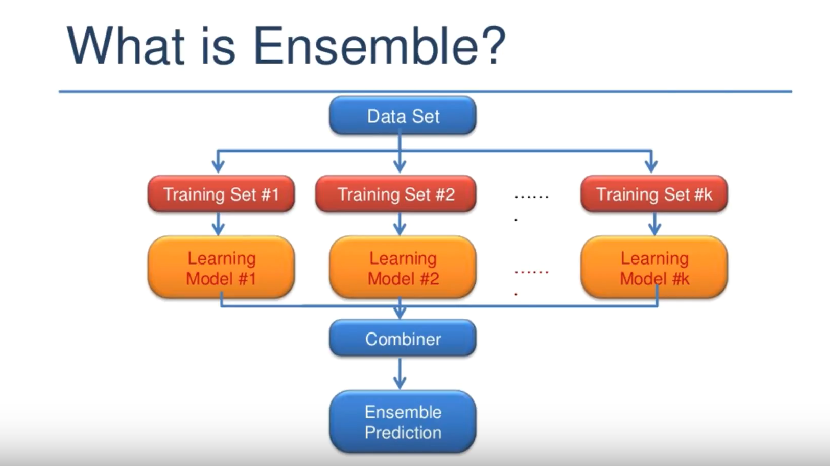

앙상블 <br>
기계가 많고 train data가 많을 때 사용 <br>
똑같은 형태의 NN Net 를 만들고 마지막에 다 합친다. <br>
실제로 이것이 2% ~ 4-5% 정도 성능이 향샹이 된다

## 레고처럼 넷트윅 모듈을 쌓자

Network 구조

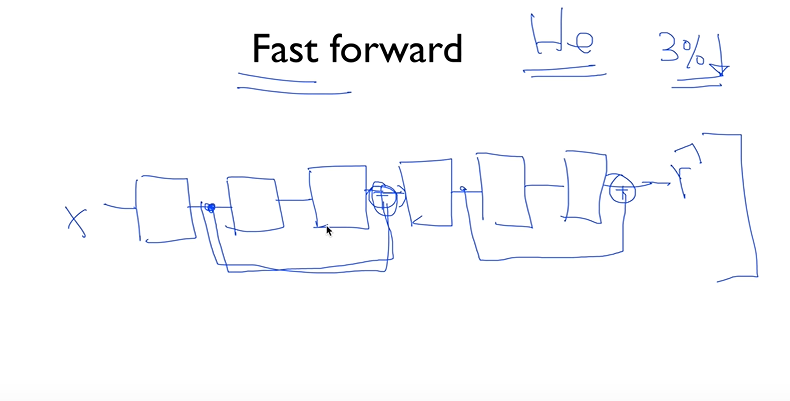

Fast forward <br>
이것이 2015년에 이미지넷 인식율 3% 이내로 에러율을 잡아준 네트워크 구조 이다. 

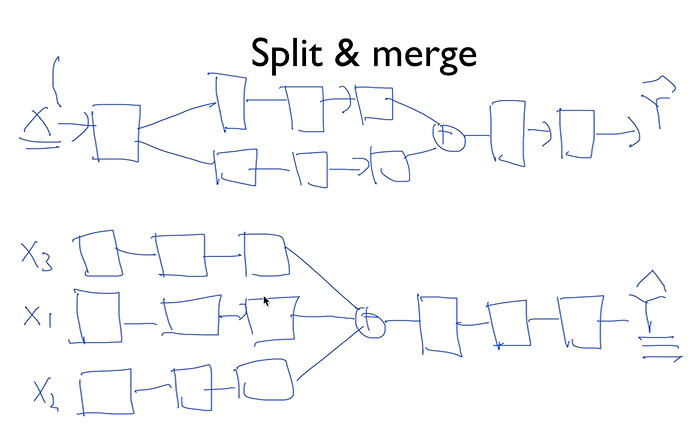

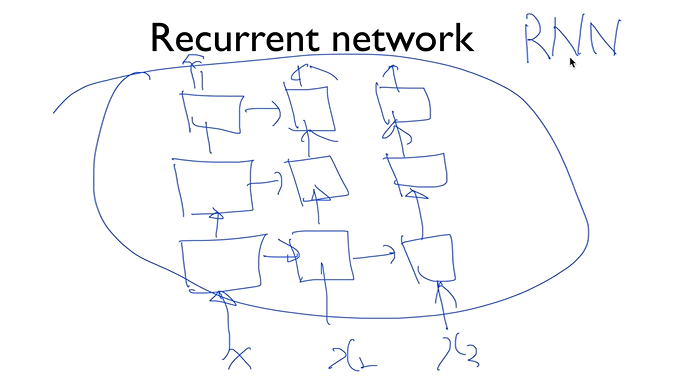

상상력으로 network 모듈을 만들 수 있다.